In [1]:
# import libraries
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import numpy.matlib

# high resolution plots 
plt.rcParams['figure.dpi'] = 300

## **The XOR Problem**
AM 9624 Assignment 6 | Karnav Raval 

### **Helper Functions**

In [2]:
# helper functions
# generate data for 4 classes (input x and output f(x)) 
def generate_data_4classes(means, sigma, ndatapoints):

    nclasses = means.shape[0] # number of classes
    
    # initialize data matrix (rows = samples, cols = inputs and desired outputs)
    data = np.zeros((nclasses * ndatapoints, 5)) # cols 1-2 = inputs, cols 3-5 = desired output (for OR, AND, and XOR function)

    # generate data for each class
    for c in range(0, nclasses):

        # get the starting and ending indicies for the current class
        starti = c * ndatapoints
        endi = (c + 1) * ndatapoints

        # generate input data (normally distributed around the corresponding mean)
        data[starti:endi, 0:1] = means[c,0] + sigma * random.standard_normal((ndatapoints, 1))
        data[starti:endi, 1:2] = means[c,1] + sigma * random.standard_normal((ndatapoints, 1))
        
        # set the class label 
        if c > 0: # set OR label to 1 for all classes except for c=0 (1 when any input is 1)
            data[starti:endi, 2] = 1 # OR
        if c == 3: # set AND label to 1 for class c=3 (1 when both inputs are 1)
            data[starti:endi, 3] = 1 # AND
        if c == 1 or c == 2: # set XOR label to 1 for classes c=1 and c=2 (middle two classes)
            data[starti:endi, 4] = 1 # XOR 
        
    # shuffle the data
    randvec = np.random.permutation(nclasses * ndatapoints)    
    data = data[randvec,:]

    return data, randvec;

# plot the input for the OR-perceptron or the AND-perceptron
def plot_data(ndatapoints, data_output, figi):

    # get the data and random vector
    data = data_output[0]
    randvec = data_output[1]    

    # set the colors for the data
    colors = np.concatenate((np.matlib.repmat(np.array([1, 0.5, 1]),ndatapoints,1),np.matlib.repmat(np.array([0.5, 1, 1]),ndatapoints,1),np.matlib.repmat(np.array([0.6, 1, 0.6]),ndatapoints,1),np.matlib.repmat(np.array([0.5, 0.5, 1]),ndatapoints,1)))
    colors = colors[randvec,:]

    # plot the data
    plt.figure(figi)
    plt.scatter(data[:,0], data[:,1], c=colors, alpha=0.5)
    plt.axis('square')  
    plt.xlabel('x1 (0 = green, 1 = red)')
    plt.ylabel('x2 (0 = small, 1 = large)')

    # set the title for the plot (OR or AND)
    if figi == 1:
        plt.title('logical OR')
    elif figi == 2:
        plt.title('logical AND')
    return colors

# plot the input for the XOR-perceptron 
def plot_data_XOR(colors, predictions_OR, predictions_AND, figi):
    plt.figure(figi)
    plt.scatter(predictions_OR, predictions_AND, c=colors) # flip AND predictions by subtracting from 1
    plt.axis('square')  
    plt.xlabel('OR Predictions') # complete this line yourself by providing a label for the x axis
    plt.ylabel('AND Predictions') # complete this line yourself by providing a label for the y axis
    plt.title('Logical XOR') # complete this line yourself by providing a title for the figure

# plot the decision boundary
def plot_boundary(weights, figi):
    b = weights[0]; w1 = weights[1]; w2 = weights[2]
    slope = -(b / w2) / (b / w1)
    y_intercept = -b / w2
    x = np.linspace(0,1,100)
    y = (slope * x) + y_intercept
    plt.figure(figi)
    plt.plot(x, y)
    plt.pause(0.4)

# predict output
def predict(inputs, weights):

    # dot product of inputs and weights + bias 
    summation = np.dot(inputs, weights[1:]) + weights[0]

    # step activation function
    if summation > 0:
      prediction = 1
    else:
      prediction = 0            
    return prediction

# train the perceptron
def train(data, learning_rate, niterations, figi=0):

    # seperate inputs and labels 
    training_inputs = data[:,0:2]
    labels = data[:,2]    

    # initialize weights (small and normally distributed) 
    weights = 0.001 * random.standard_normal(data.shape[1]) 

    # initialize errors (track for every sample and every iteration)
    errors = np.zeros((data.shape[0], niterations))

    # do multiple passes over the entire dataset
    j = 0
    for _ in range(niterations):
        i = 0

        # iteration over each sample in the dataset
        for inputs, label in zip(training_inputs, labels):
            
            # forward pass
            prediction = predict(inputs, weights)
            
            # update weights and bias
            weights[1:] += learning_rate * (label - prediction) * inputs
            weights[0] += learning_rate * (label - prediction)
            
            # track errors
            errors[i,j] = label - prediction
            i += 1   
        
        # update the iteration index 
        j += 1        
    return weights, errors;

# test the perceptron    
def test(data, weights):

    # seperate input and labels
    inputs_test = data[:,0:2]
    labels = data[:,2]

    # initialize predications array
    npredictions = data.shape[0]
    predictions = np.zeros(npredictions)

    # predict for each sample in the dataset
    for i in range(0, npredictions):
        predictions[i] = predict(inputs_test[i,:], weights)
    return predictions

### **Main function**

In [3]:
# main function
def ps9(monitor):

    # seed the random number generator (to ensure that we all generate the same data and initial weights)
    random.seed(3)

    ## GENERATE TRAINING DATA

    # generate training data    
    means = np.array([[0.3,0.3],[0.3,0.75],[0.75,0.3],[0.75,0.75]])
    sigma = 0.04

    ndatapoints = 20 # number of data points per class
    
    data_output_train = generate_data_4classes(means, sigma, ndatapoints)  
    data_train = data_output_train[0]
    randvec_train = data_output_train[1] 

    ## TRAIN PERCEPTRONS

    # training parameters
    learning_rate = 0.01
    niterations = 2

    # train perceptron 1 (OR)
    data_OR = data_train[:,[0,1,2]] #
    training_output = train(data_OR, learning_rate, niterations)
    weights_OR = training_output[0]

    # train perceptron 2 (AND)    
    data_AND = data_train[:,[0,1,3]]
    training_output = train(data_AND, learning_rate, niterations)
    weights_AND = training_output[0]

    # train perceptron 3 (XOR)
    # this perceptron takes the outputs from perceptron 1 and 2 as input (= as training data)
    predictions_OR = test(data_OR, weights_OR)
    predictions_AND = test(data_AND, weights_AND)

    # assemble the training data (complete this yourself using the test function - needs 2-3 lines of code) 
    labels_XOR = data_train[:,4]
    data_XOR = np.zeros((len(labels_XOR), 3))

    data_XOR[:, 0] = predictions_OR
    data_XOR[:, 1] = predictions_AND
    data_XOR[:, 2] = labels_XOR

    training_output = train(data_XOR, learning_rate, niterations)
    weights_XOR = training_output[0]

    print(f"labels_XOR: {labels_XOR}")
    print(f"predictions_XOR: {test(data_XOR, weights_XOR)}")

    accuracy = np.sum(test(data_XOR, weights_XOR) == labels_XOR) / len(labels_XOR) * 100
    print(f"Accuracy: {accuracy}%")

    # show training data and decision boundaries for the three perceptrons
    if monitor:
        plt.ion() # you may need to turn interactive mode on for figure plotting        
        # perceptron 1 (OR)
        colors = plot_data(ndatapoints, data_output_train, 1)
        plot_boundary(weights_OR, 1)
        # perceptron 2 (AND)
        colors = plot_data(ndatapoints, data_output_train, 2)
        plot_boundary(weights_AND, 2)
        # perceptron 3 (XOR)        
        plot_data_XOR(colors, predictions_OR, predictions_AND, 3)
        plot_boundary(weights_XOR, 3)

    # print weights
    print('weights for perceptron 1 (OR):')
    print(weights_OR)
    print('weights for perceptron 2 (AND):')
    print(weights_AND)
    print('weights for perceptron 3 (XOR):')
    print(weights_XOR)

labels_XOR: [1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 0. 0. 1. 1.]
predictions_XOR: [1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 0. 0. 1. 1.]
Accuracy: 100.0%


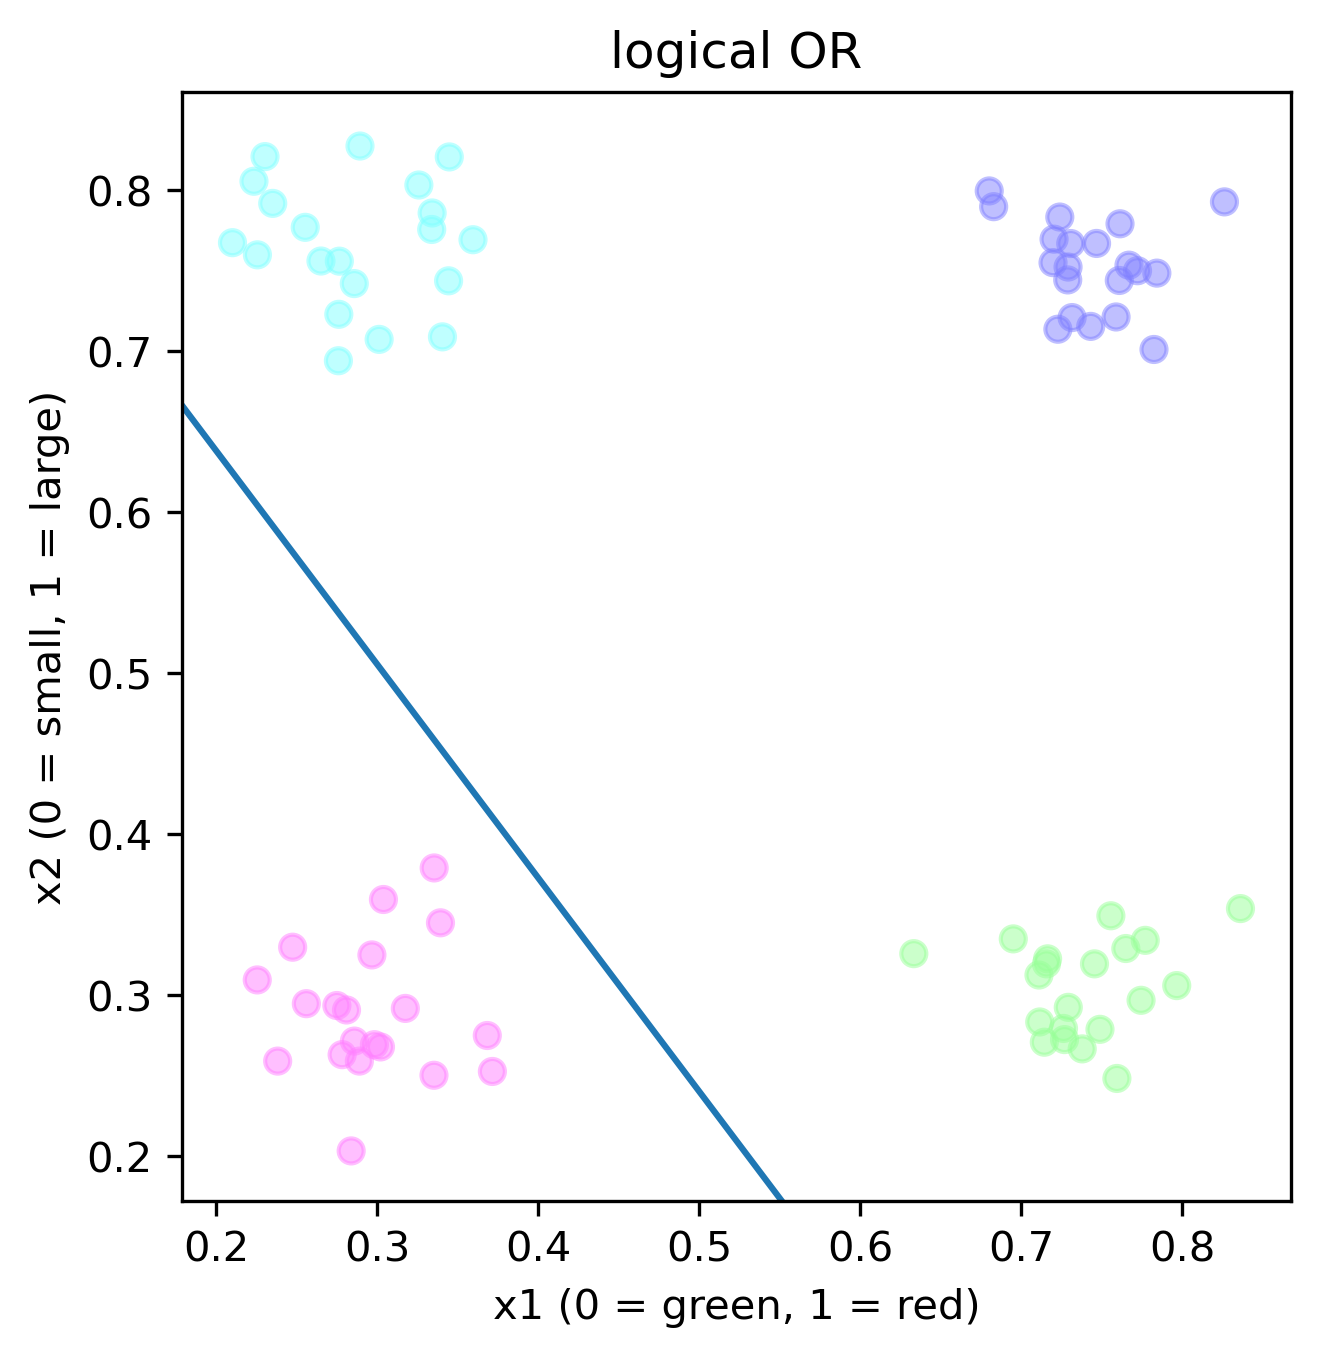

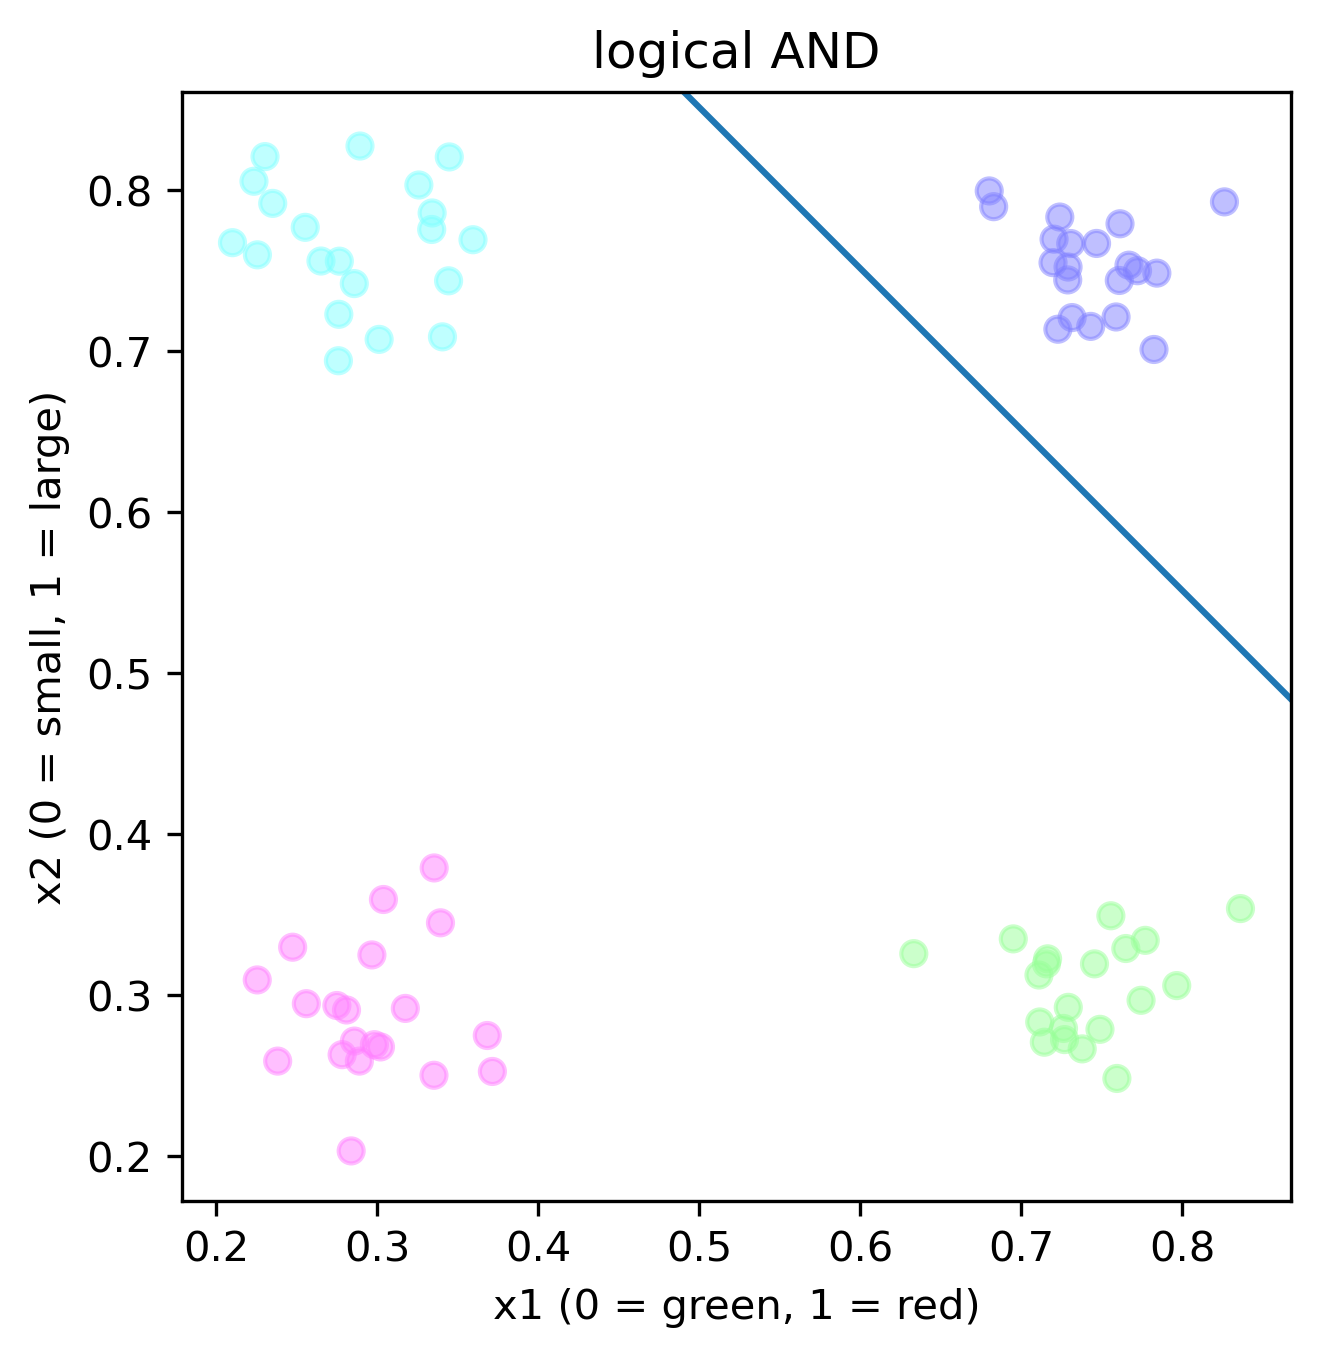

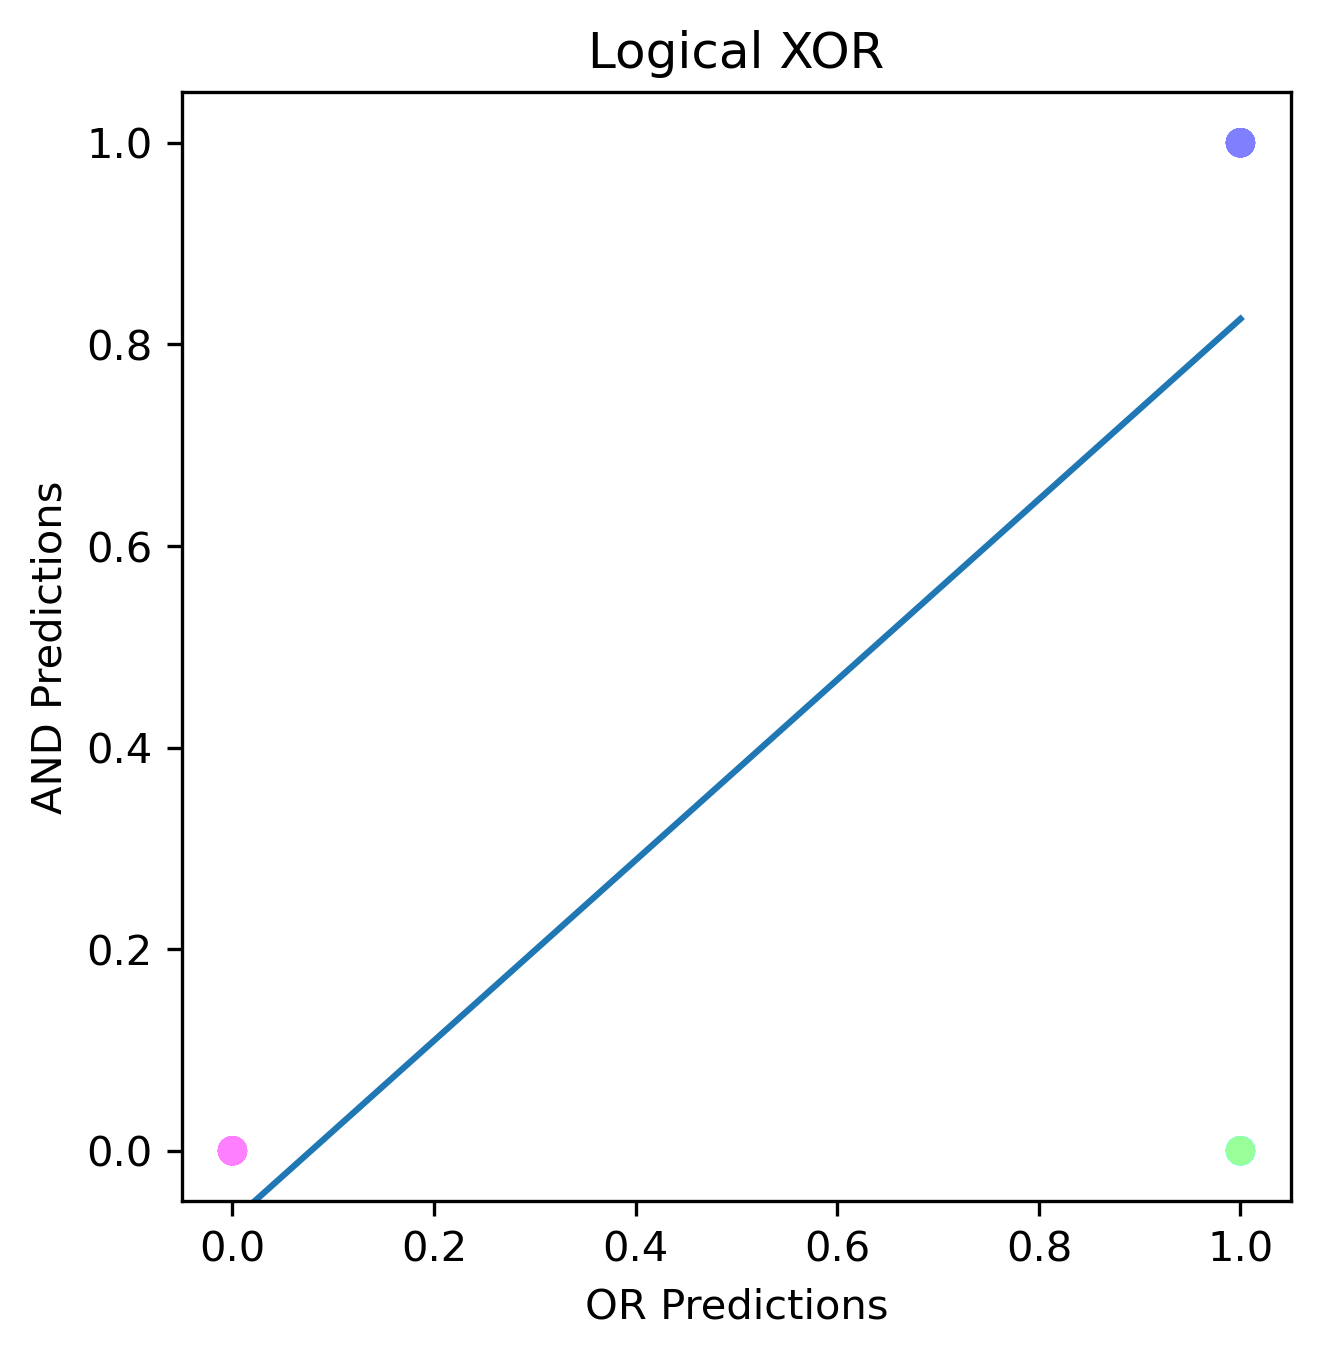

weights for perceptron 1 (OR):
[-0.00807144  0.01185021  0.00893372]
weights for perceptron 2 (AND):
[-0.03021159  0.02235376  0.02234948]
weights for perceptron 3 (XOR):
[-0.00071569  0.00919316 -0.01027194]


In [4]:
ps9(monitor = 1)